<a href="https://colab.research.google.com/github/Affan75/Affan75/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

data = pd.read_csv("/content/exchange_rate.csv" , header=0, index_col=0,parse_dates=True)
print(data.head())

#Check the columns to identify the date column
print(data.columns)


                  Ex_rate
date                     
01-01-1990 00:00   0.7855
02-01-1990 00:00   0.7818
03-01-1990 00:00   0.7867
04-01-1990 00:00   0.7860
05-01-1990 00:00   0.7849
Index(['Ex_rate'], dtype='object')


In [ ]:
data.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6+ KB


In [ ]:
data.isnull().sum()

Ex_rate    0
dtype: int64

Time Series plot : we conclude that plot contains irregularity component , no trend and seasonality

model = et

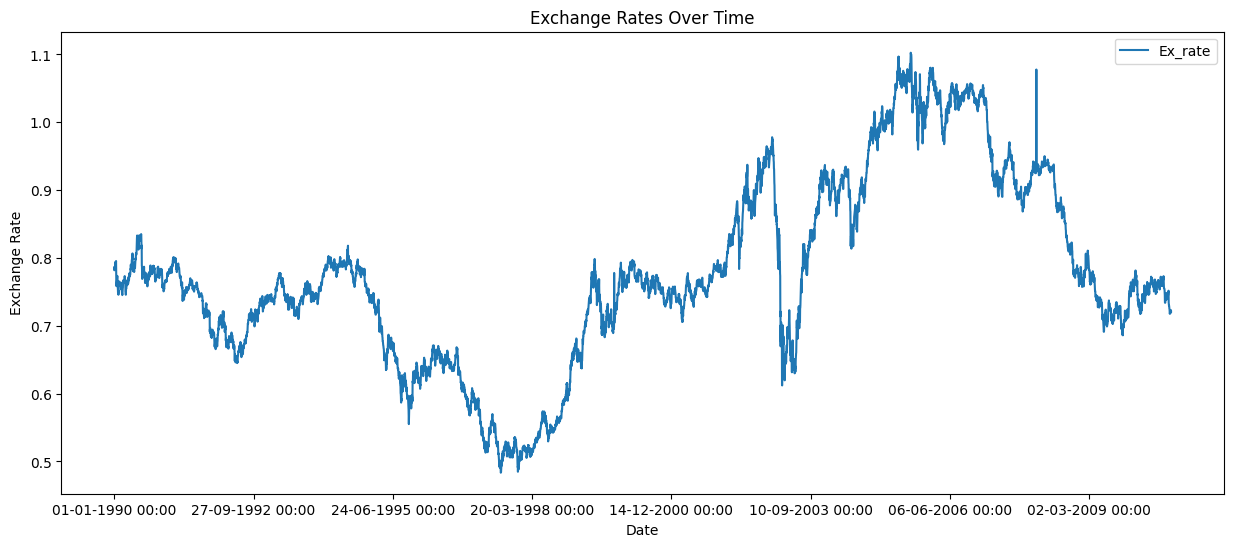

In [ ]:
# Plot the time series for each currency
data.plot(figsize=(15, 6))
plt.title('Exchange Rates Over Time')
plt.ylabel('Exchange Rate')
plt.xlabel('Date')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(data['Ex_rate'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# Critical values to determine stationarity
for key, value in adf_result[4].items():
    print('Critical Value ({}): {:.3f}'.format(key, value))


ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477
Critical Value (1%): -3.431
Critical Value (5%): -2.862
Critical Value (10%): -2.567


ADF Statistic vs. Critical Values:

The ADF statistic (-1.6649941807382342) is not less than the critical values at the 1%, 5%, or 10% significance levels. For the series to be considered stationary, the ADF statistic should be less than the critical values, indicating that we can reject the null hypothesis of a unit root (non-stationarity).
p-value:

The p-value (0.4492327353597477) is significantly higher than the typical significance level of 0.05. A high p-value indicates that we fail to reject the null hypothesis that the series has a unit root, suggesting that the series is not stationary.

Conclusion:
Based on the ADF test results, we fail to reject the null hypothesis of non-stationarity. This means the time series data is not stationary.

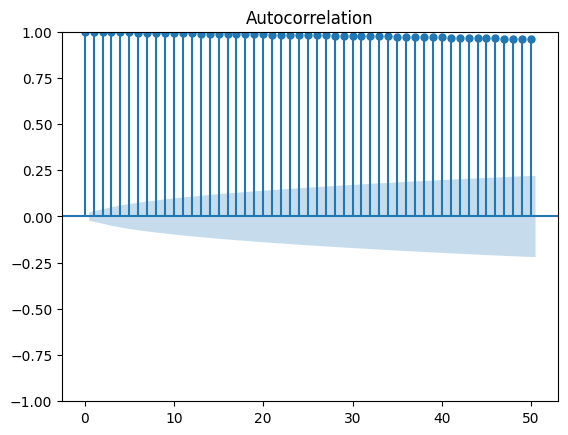

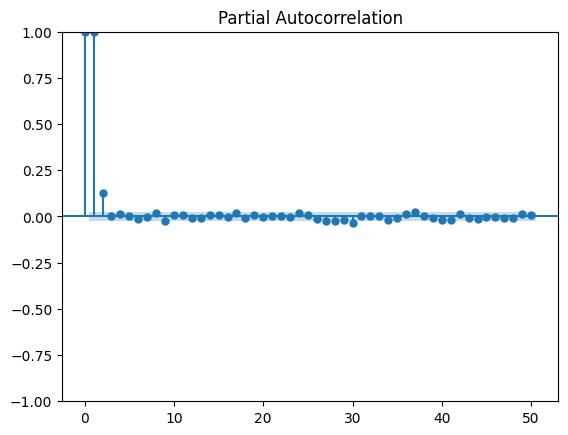

In [ ]:
#ACF and #PACF

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example for one currency, e.g., 'USD'
exchange_rate = 'usd'
plot_acf(data['Ex_rate'].dropna(), lags=50)
plt.show()

plot_pacf(data[ 'Ex_rate'].dropna(), lags=50)
plt.show()


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.2 MB/s eta 0:00:00


In [ ]:
# Use auto_arima to find the best ARIMA parameters

from pmdarima import auto_arima

model = auto_arima(data['Ex_rate'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-56098.154, Time=3.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-55972.211, Time=1.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-56102.338, Time=0.66 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-56100.772, Time=9.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-55974.195, Time=0.51 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-56100.340, Time=4.55 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-56100.341, Time=6.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-56098.328, Time=11.73 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-56104.319, Time=1.23 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-56102.321, Time=1.56 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-56102.322, Time=4.48 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-56102.753, Time=1.98 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-56100.315, Time=6.12 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 53.695 se

By Auto.arima we can get best model , ARIMA(1,1,0)

autoregression order = 1

differeniation = 1

moving average order = 0

##To convert the non-stationary data into stationary data

we can use differencing method.

In [ ]:
# Apply differencing to make the series stationary
data_diff = data['Ex_rate'].diff().dropna()

# Perform Augmented Dickey-Fuller test on differenced data
adf_result_diff = adfuller(data_diff)
print('ADF Statistic (Differenced):', adf_result_diff[0])
print('p-value (Differenced):', adf_result_diff[1])

# Critical values to determine stationarity
for key, value in adf_result_diff[4].items():
    print('Critical Value (Differenced) ({}): {:.3f}'.format(key, value))

ADF Statistic (Differenced): -99.39343120118632
p-value (Differenced): 0.0
Critical Value (Differenced) (1%): -3.431
Critical Value (Differenced) (5%): -2.862
Critical Value (Differenced) (10%): -2.567


## Conclusion:
The differenced time series is stationary. This conclusion is supported by the ADF statistic being significantly lower than the critical values and the p-value being 0.0.



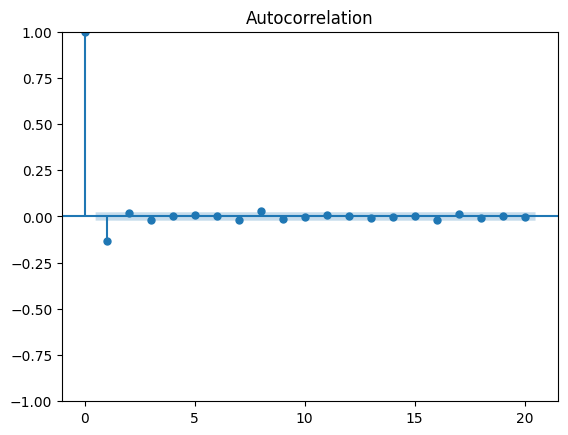

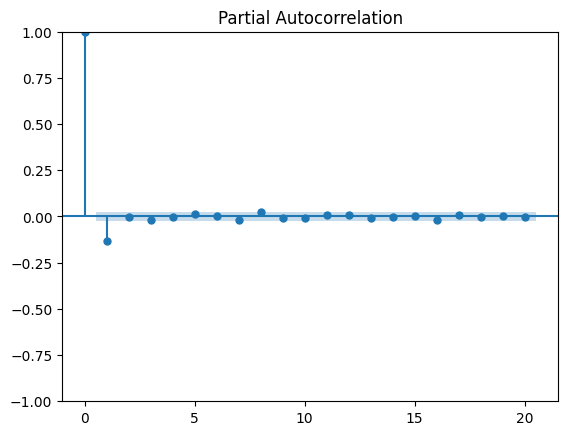

In [ ]:
# Plot ACF and PACF to identify potential p and q values
plot_acf(data_diff, lags=20)
plot_pacf(data_diff, lags=20)
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data , order = (1,1,0))
result = model.fit()
result.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 0)   Log Likelihood               28054.159
Date:                Fri, 24 May 2024   AIC                         -56104.319
Time:                        05:18:14   BIC                         -56090.450
Sample:                             0   HQIC                        -56099.559
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865011.36
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

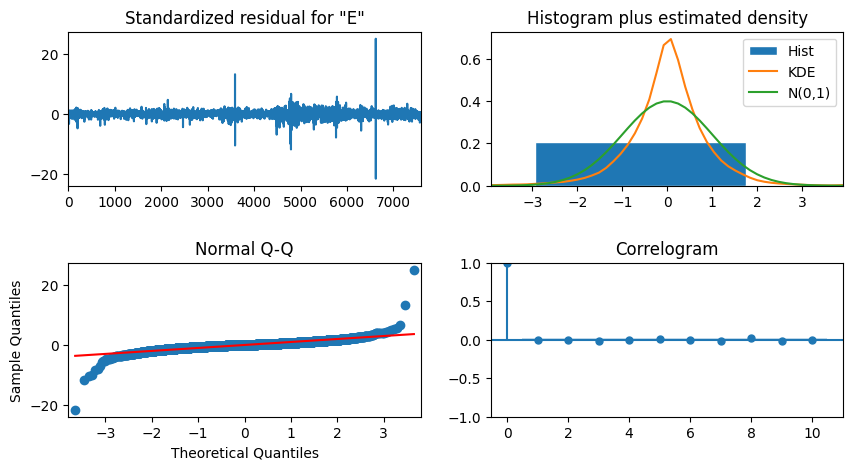

In [ ]:
result.plot_diagnostics(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Diagnostic plot of best model.png')
plt.show()

### From Histogram plot Residuals follows normal distrubtion

In [ ]:
predictions = result.predict(typ = 'levels')

In [ ]:
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(data['Ex_rate'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(data['Ex_rate'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(data['Ex_rate'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(data['Ex_rate'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(data['Ex_rate'],predictions)))


Evaluation Result for whole data :  

R2 Score for whole data : 99.37 % 

Mean Squared Error :  0.00011726566632563849 

Mean Absolute Error :  0.0037958804054502096 

Root Mean Squared Error :  0.010828927293395154 

Mean Absolute Percentage Error : 0.50 %


In [ ]:
Final_data = pd.concat([data,data_diff ,predictions],axis=1)
Final_data.columns = ['Exchange Rate','First Difference','Predicted Exchange Rate']
Final_data.to_csv('Foreign Exchange Rate with Prediction (Euro To USD).csv')
Final_data.head()

,Exchange Rate,First Difference,Predicted Exchange Rate
date,,,
01-01-1990 00:00,0.7855,NaN,0.000000
02-01-1990 00:00,0.7818,-0.0037,0.785500
03-01-1990 00:00,0.7867,0.0049,0.782286
04-01-1990 00:00,0.7860,-0.0007,0.786056
05-01-1990 00:00,0.7849,-0.0011,0.786092


In [ ]:
size = int(len(data)*0.80)
train , test = data[0:size]['Ex_rate'] , data[size:(len(data))]['Ex_rate']
print('Counts of Train Data : ',train.shape[0])
print('Counts of Test Data : ',test.shape[0])

Counts of Train Data :  6070
Counts of Test Data :  1518


In [ ]:
train_values = [x for x in train]
prediction = []
print('Printing Predictied vs Expected Values....')
print('\n')
for t in range(len(test)):
    model = ARIMA(train_values , order = (1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred_out = output[0]
    prediction.append(float(pred_out))
    test_in = test[t]
    train_values.append(test_in)
    print('Predicted = %f , Actual = %f' % (pred_out , test_in))

Printing Predictied vs Expected Values....


Predicted = 1.023543 , Actual = 1.025347
Predicted = 1.025240 , Actual = 1.026905
Predicted = 1.026812 , Actual = 1.037344
Predicted = 1.036721 , Actual = 1.038875
Predicted = 1.038784 , Actual = 1.032855
Predicted = 1.033214 , Actual = 1.033293
Predicted = 1.033267 , Actual = 1.031800
Predicted = 1.031889 , Actual = 1.025546
Predicted = 1.025918 , Actual = 1.034650
Predicted = 1.034105 , Actual = 1.035411
Predicted = 1.035366 , Actual = 1.035025
Predicted = 1.035048 , Actual = 1.033293
Predicted = 1.033396 , Actual = 1.036549
Predicted = 1.036354 , Actual = 1.037517
Predicted = 1.037459 , Actual = 1.039933
Predicted = 1.039789 , Actual = 1.036807
Predicted = 1.036994 , Actual = 1.033592
Predicted = 1.033784 , Actual = 1.036592
Predicted = 1.036413 , Actual = 1.043841
Predicted = 1.043408 , Actual = 1.040745
Predicted = 1.040930 , Actual = 1.042731
Predicted = 1.042612 , Actual = 1.039199
Predicted = 1.039410 , Actual = 1.038551
Predicted = 

In [ ]:
print('Evaluation Result for Test data : ','\n')
print('R2 Score for Test data : {0:.2f} %'.format(100*r2_score(test,prediction)),'\n')
print('Mean Squared Error : ',mean_squared_error(test,prediction),'\n')
print('Mean Absolute Error : ',mean_absolute_error(test,prediction),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(test,prediction)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(test,prediction)))

Evaluation Result for Test data :  

R2 Score for Test data : 99.59 % 

Mean Squared Error :  4.96725196075754e-05 

Mean Absolute Error :  0.003328749852742463 

Root Mean Squared Error :  0.007047873410297279 

Mean Absolute Percentage Error : 0.40 %


In [ ]:
predictions_df = pd.Series(prediction, index = test.index)

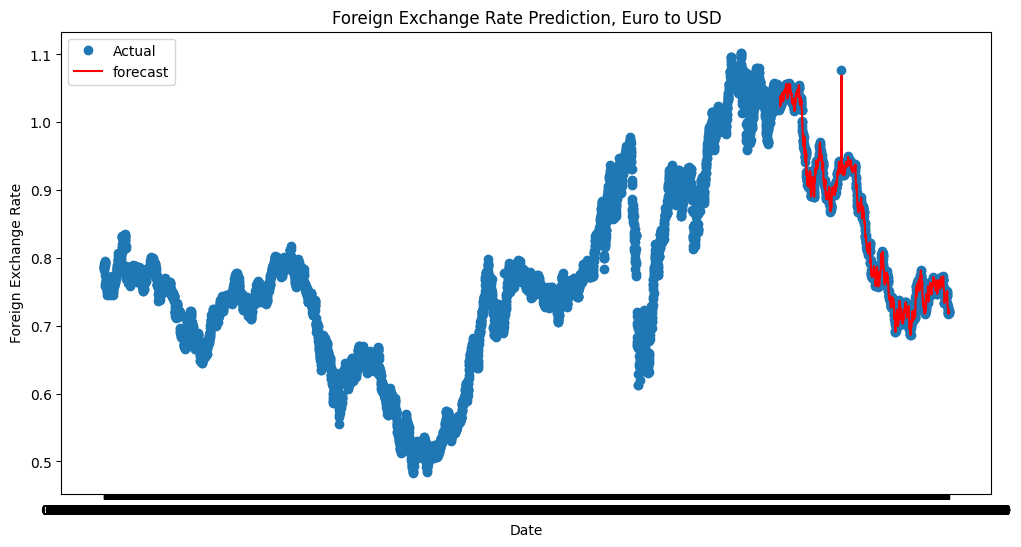

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction, Euro to USD', xlabel='Date', ylabel='Foreign Exchange Rate')
ax.plot(data, 'o', label='Actual')
ax.plot(predictions_df, 'r', label='forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')
plt.savefig('Foreign Exchange Rate Prediction - Euro to USD.png')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


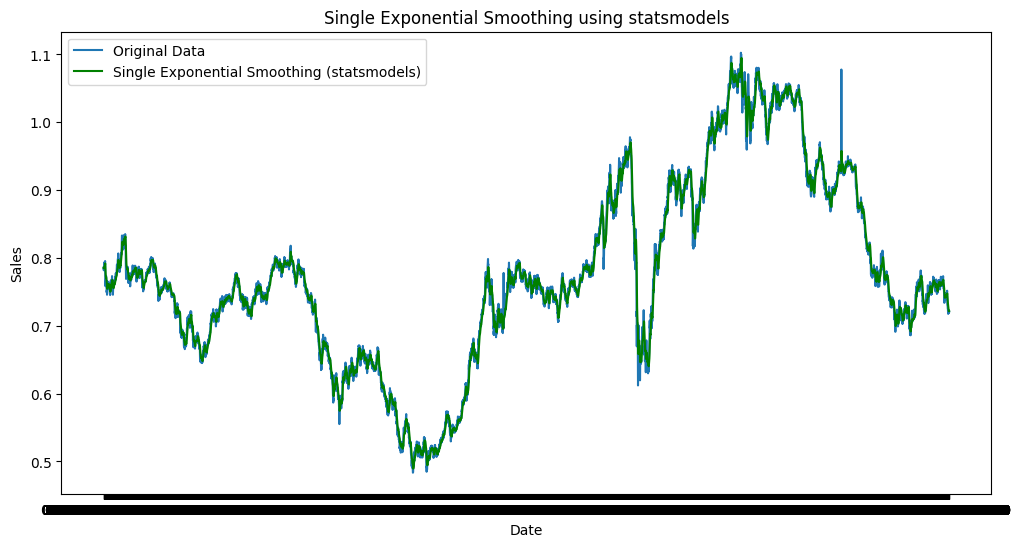

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Define the smoothing factor
alpha = 0.2


# Fit the model
modelE = SimpleExpSmoothing(data['Ex_rate']).fit(smoothing_level=alpha, optimized=False)


# Forecast values

data['SES_sm'] = modelE.fittedvalues

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Original Data')
plt.plot(data['SES_sm'], label='Single Exponential Smoothing (statsmodels)', color='green')
plt.title('Single Exponential Smoothing using statsmodels')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
